In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.stats as stats
import glob

In [7]:
def plot_TS_mass(filetag, ncol=4):
    filenamelist = glob.glob(f'/data/user/tchau/DarkMatter_OscNext/Significance/{filetag}')
    # Determine the number of rows and columns for subplots
    num_files = len(filenamelist)

    num_columns = min(num_files, ncol)
    num_rows = 1 if num_files <= ncol else (num_files + num_columns - 1) // num_columns

    # Create the big plot with subplots
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 3*num_rows))  # Adjust figsize as needed

    # Loop through the file locations and create subplots
    ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}
    chs = list(ch_title.keys())
    profiles = ['NFW', 'Burkert']
    prcs = ['ann', 'decay']
    sorted_filelist = sorted(filenamelist, key=lambda x: prcs.index(next((k for k in prcs if k in x), '')))
    sorted_filelist = sorted(sorted_filelist, key=lambda x: chs.index(next((k for k in chs if k in x), '')))

    for i, file_loc in enumerate(sorted_filelist):
        row = i // num_columns
        col = i % num_columns

        if num_files > ncol:
            ax = axs[row, col]
        else:
            ax = axs[col]

        # Load and plot the file on the corresponding subplot
        result = pkl.load(open(file_loc, 'rb'))
        mass = list(result.keys())
        TS = np.array([])
        for m in mass:
            TS = np.append(TS, result[m]['TSdata'])
        ax.plot(mass, TS, marker='*')
        ax.semilogx()
        # plt.semilogy()
        max_index = np.argmax(TS)
        max_m = mass[max_index]
        p = 1-(1/2 + 1/2*stats.chi2.cdf(max(TS), 1))
        z = stats.norm.ppf(1 - p)
        xi_bf = np.round(result[max_m]['xi_bestfit'], 3)
        text = f'highest at mass {np.round(max_m, 2)}GeV\n' + f'TS={np.round(max(TS), 2)}\n p={np.round(p, 3)} \n z={np.round(z, 2)}\n' + r'$\xi$={}'.format(xi_bf)
        ax.text(0.05, 0.95, text, transform=ax.transAxes, va='top', ha='left', fontsize=10)

        for ch in chs:
            if ch in file_loc:
                channel = ch
        for profile in profiles:
            if profile in file_loc:
                prf = profile 
        for process in prcs:
            if process in file_loc:
                prc = process 
        ax.set_title(f'{ch_title[channel]} {prf} {prc}')

        # Set x and y labels
        ax.set_xlabel('m [GeV]')
        ax.set_ylabel('TS')


        
    
    # Adjust spacing between subplots and avoid label overlap
    fig.tight_layout()

    # Show or save the plot
    plt.show()

def plot_TS_scan(filetag, ncol=4):
    filenamelist = glob.glob(f'/data/user/tchau/DarkMatter_OscNext/Significance/{filetag}')
    # Determine the number of rows and columns for subplots
    num_files = len(filenamelist)

    num_columns = min(num_files, ncol)
    num_rows = 1 if num_files <= ncol else (num_files + num_columns - 1) // num_columns

    # Create the big plot with subplots
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(12, 3*num_rows))  # Adjust figsize as needed

    # Loop through the file locations and create subplots
    ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}
    chs = list(ch_title.keys())
    profiles = ['NFW', 'Burkert']
    prcs = ['ann', 'decay']
    sorted_filelist = sorted(filenamelist, key=lambda x: prcs.index(next((k for k in prcs if k in x), '')))
    sorted_filelist = sorted(sorted_filelist, key=lambda x: chs.index(next((k for k in chs if k in x), '')))

    for i, file_loc in enumerate(sorted_filelist):
        row = i // num_columns
        col = i % num_columns

        if num_files > ncol:
            ax = axs[row, col]
        else:
            ax = axs[col]

        # Load and plot the file on the corresponding subplot
        result = pkl.load(open(file_loc, 'rb'))
        mass = list(result.keys())
        TS = np.array([])
        for m in mass:
            TS = np.append(TS, result[m]['TSdata'])
        # ax.semilogx()
        # plt.semilogy()
        
        max_index = np.argmax(TS)
        max_m = mass[max_index]
        p = 1-(1/2 + 1/2*stats.chi2.cdf(max(TS), 1))
        z = stats.norm.ppf(1 - p)
        xi_bf = np.round(result[max_m]['xi_bestfit'], 3)
        text = f'at mass {np.round(max_m, 2)}GeV\n' + f'TS={np.round(max(TS), 2)}\n p={np.round(p, 3)} \n z={np.round(z, 2)}\n' + r'$\xi$={}'.format(xi_bf)
        ax.text(0.05, 0.95, text, transform=ax.transAxes, va='top', ha='left', fontsize=10)
        
        ax.plot(result[max_m]['LLR']['xi_scan'], -result[max_m]['LLR']['LLR_scan'])
        ax.axvline(x=result[max_m]['xi_bestfit'], ls='--', color='red')

        for ch in chs:
            if ch in file_loc:
                channel = ch
        for profile in profiles:
            if profile in file_loc:
                prf = profile 
        for process in prcs:
            if process in file_loc:
                prc = process 
        ax.set_title(f'{ch_title[channel]} {prf} {prc}')

        # Set x and y labels
        ax.set_ylabel('-2LLR')
        ax.set_xlabel(r'$\xi$')
        # ax.set_xlim(-0.01, 0.01)
        # ax.set_ylim(-5, 25)


        
    
    # Adjust spacing between subplots and avoid label overlap
    fig.tight_layout()

    # Show or save the plot
    plt.show()

def plot_TS_map(filetag, ncol=4):
    filenamelist = glob.glob(f'/data/user/tchau/DarkMatter_OscNext/Significance/{filetag}')
    # Determine the number of rows and columns for subplots
    num_files = len(filenamelist)

    num_columns = min(num_files, ncol)
    num_rows = 1 if num_files <= ncol else (num_files + num_columns - 1) // num_columns

    # Create the big plot with subplots
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 3*num_rows))  # Adjust figsize as needed

    # Loop through the file locations and create subplots
    ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}
    chs = list(ch_title.keys())
    profiles = ['NFW', 'Burkert']
    prcs = ['ann', 'decay']
    sorted_filelist = sorted(filenamelist, key=lambda x: prcs.index(next((k for k in prcs if k in x), '')))
    sorted_filelist = sorted(sorted_filelist, key=lambda x: chs.index(next((k for k in chs if k in x), '')))

    plt.set_cmap('bwr')
    for i, file_loc in enumerate(sorted_filelist):
        row = i // num_columns
        col = i % num_columns

        if num_files > ncol:
            ax = axs[row, col]
        else:
            ax = axs[col]

        # Load and plot the file on the corresponding subplot
        result = pkl.load(open(file_loc, 'rb'))
        mass = list(result.keys())
        TS = np.array([])
        for m in mass:
            TS = np.append(TS, result[m]['TSdata'])
        # ax.semilogx()
        # plt.semilogy()
        
        max_index = np.argmax(TS)
        max_m = mass[max_index]
        p = 1-(1/2 + 1/2*stats.chi2.cdf(max(TS), 1))
        z = stats.norm.ppf(1 - p)
        xi_bf = np.round(result[max_m]['xi_bestfit'], 3)
        text = f'at mass {np.round(max_m, 2)}GeV\n' + f'TS={np.round(max(TS), 2)}\n p={np.round(p, 3)} \n z={np.round(z, 2)}\n' + r'$\xi$={}'.format(xi_bf)
        ax.text(0.05, 0.95, text, transform=ax.transAxes, va='top', ha='left', fontsize=10)
        
        TS_hist = result[max_m]['TS_histogram']['TS']
        Eedges = np.linspace(1, 3, TS_hist.shape[1]+1)
        Psiedges = np.linspace(0, 180, TS_hist.shape[0]+1)
        mesh = ax.pcolormesh(Psiedges, Eedges, TS_hist.T, norm=colors.CenteredNorm())
        fig.colorbar(mesh, ax=ax)

        for ch in chs:
            if ch in file_loc:
                channel = ch
        for profile in profiles:
            if profile in file_loc:
                prf = profile 
        for process in prcs:
            if process in file_loc:
                prc = process 
        ax.set_title(f'{ch_title[channel]} {prf} {prc}')

        # Set x and y labels
        ax.set_ylabel(r'$log_{10} E[GeV]$')
        ax.set_xlabel(r'$\psi$')
        # ax.set_xlim(-0.01, 0.01)
        # ax.set_ylim(-5, 25)


        
    
    # Adjust spacing between subplots and avoid label overlap
    fig.tight_layout()

    # Show or save the plot
    plt.show()

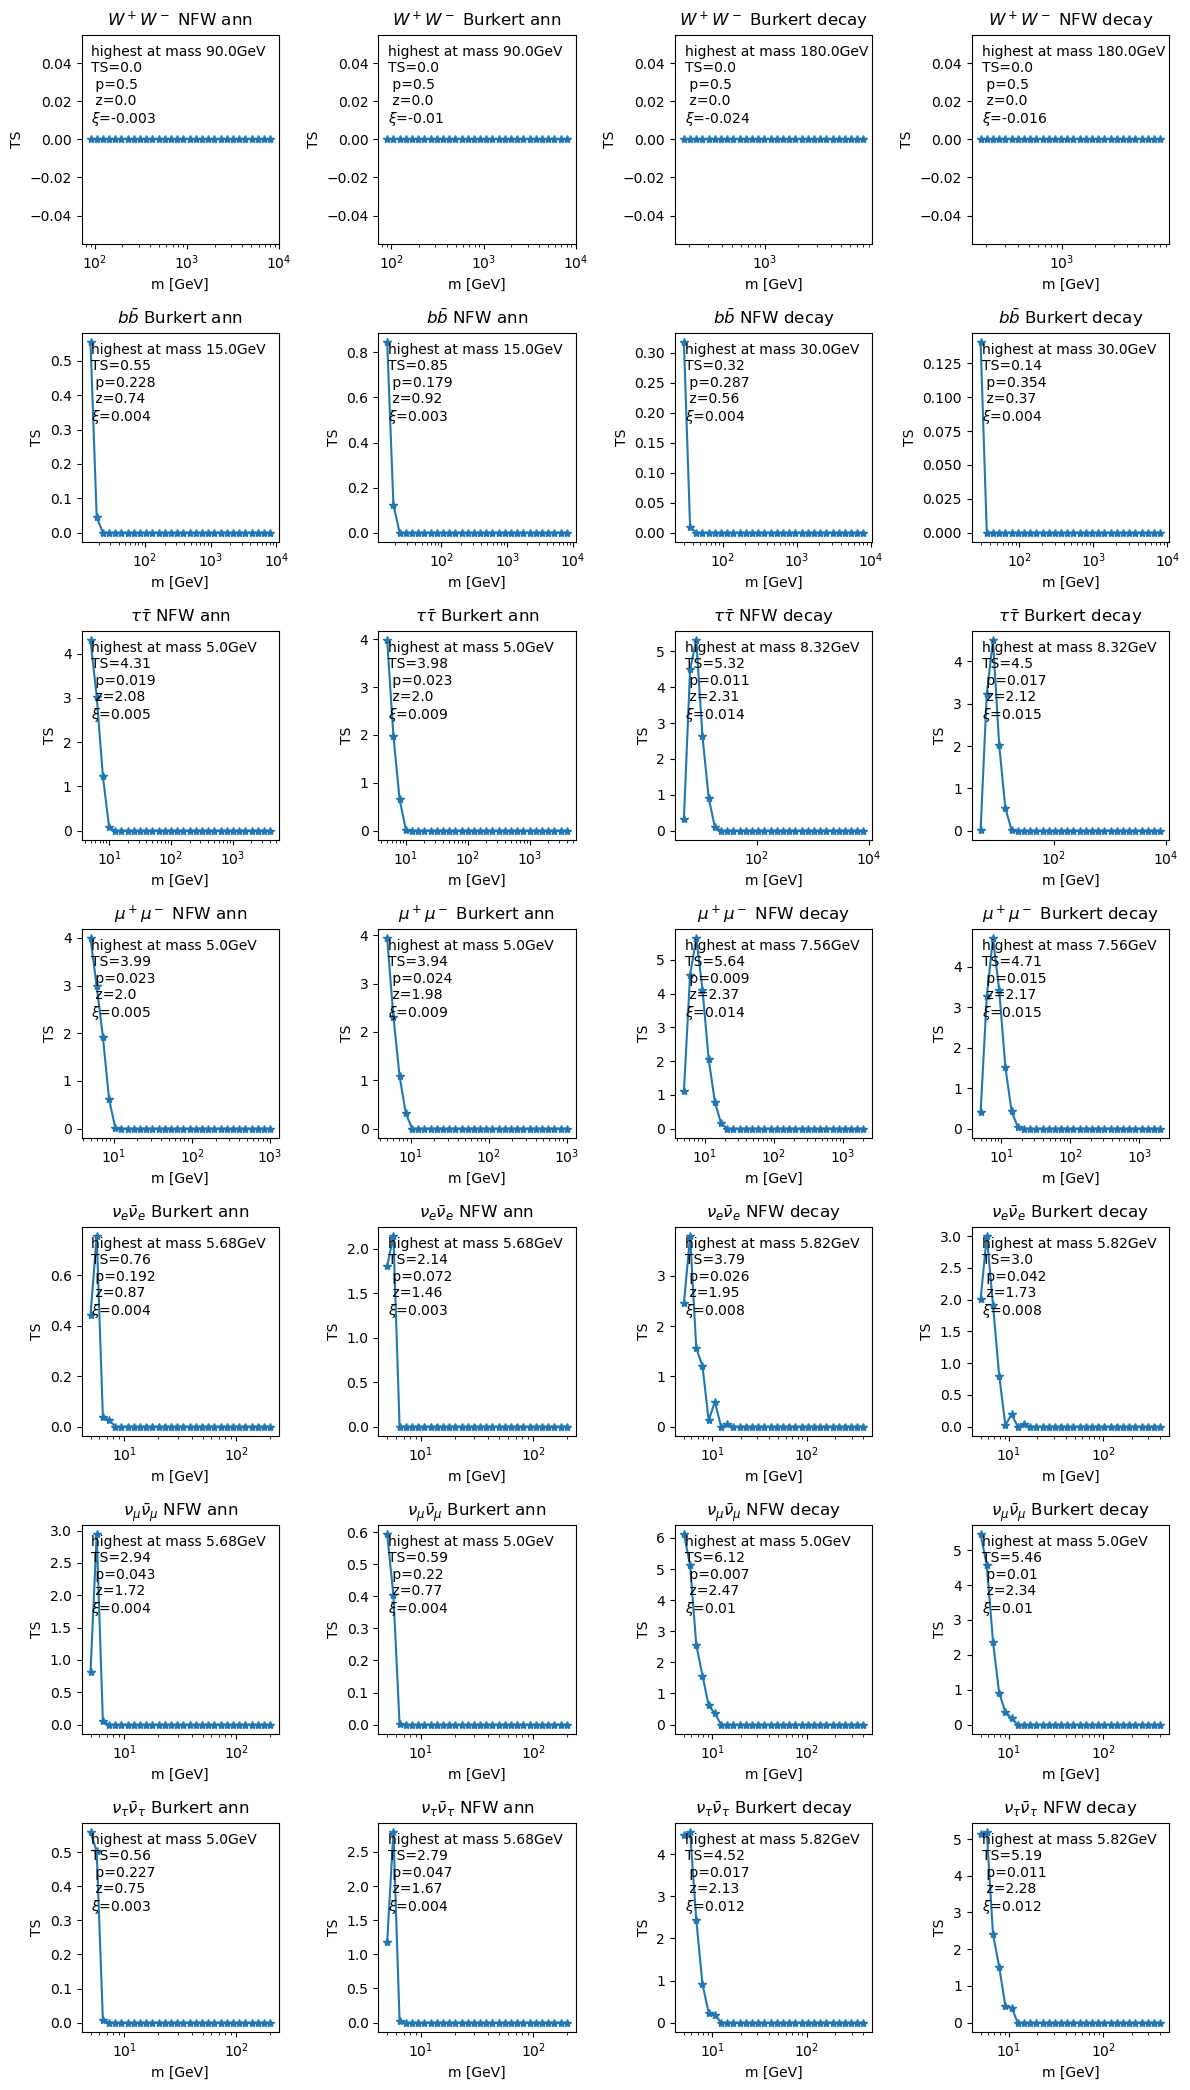

In [13]:
filetag = '*RABkgdata*data_v4.pkl' #1000, 10, 12, 2023
filetag = '*RABkgdata*data_v4_testBkg100RAsample.pkl' #1000, 10, 12, 2023

plot_TS_mass(filetag)


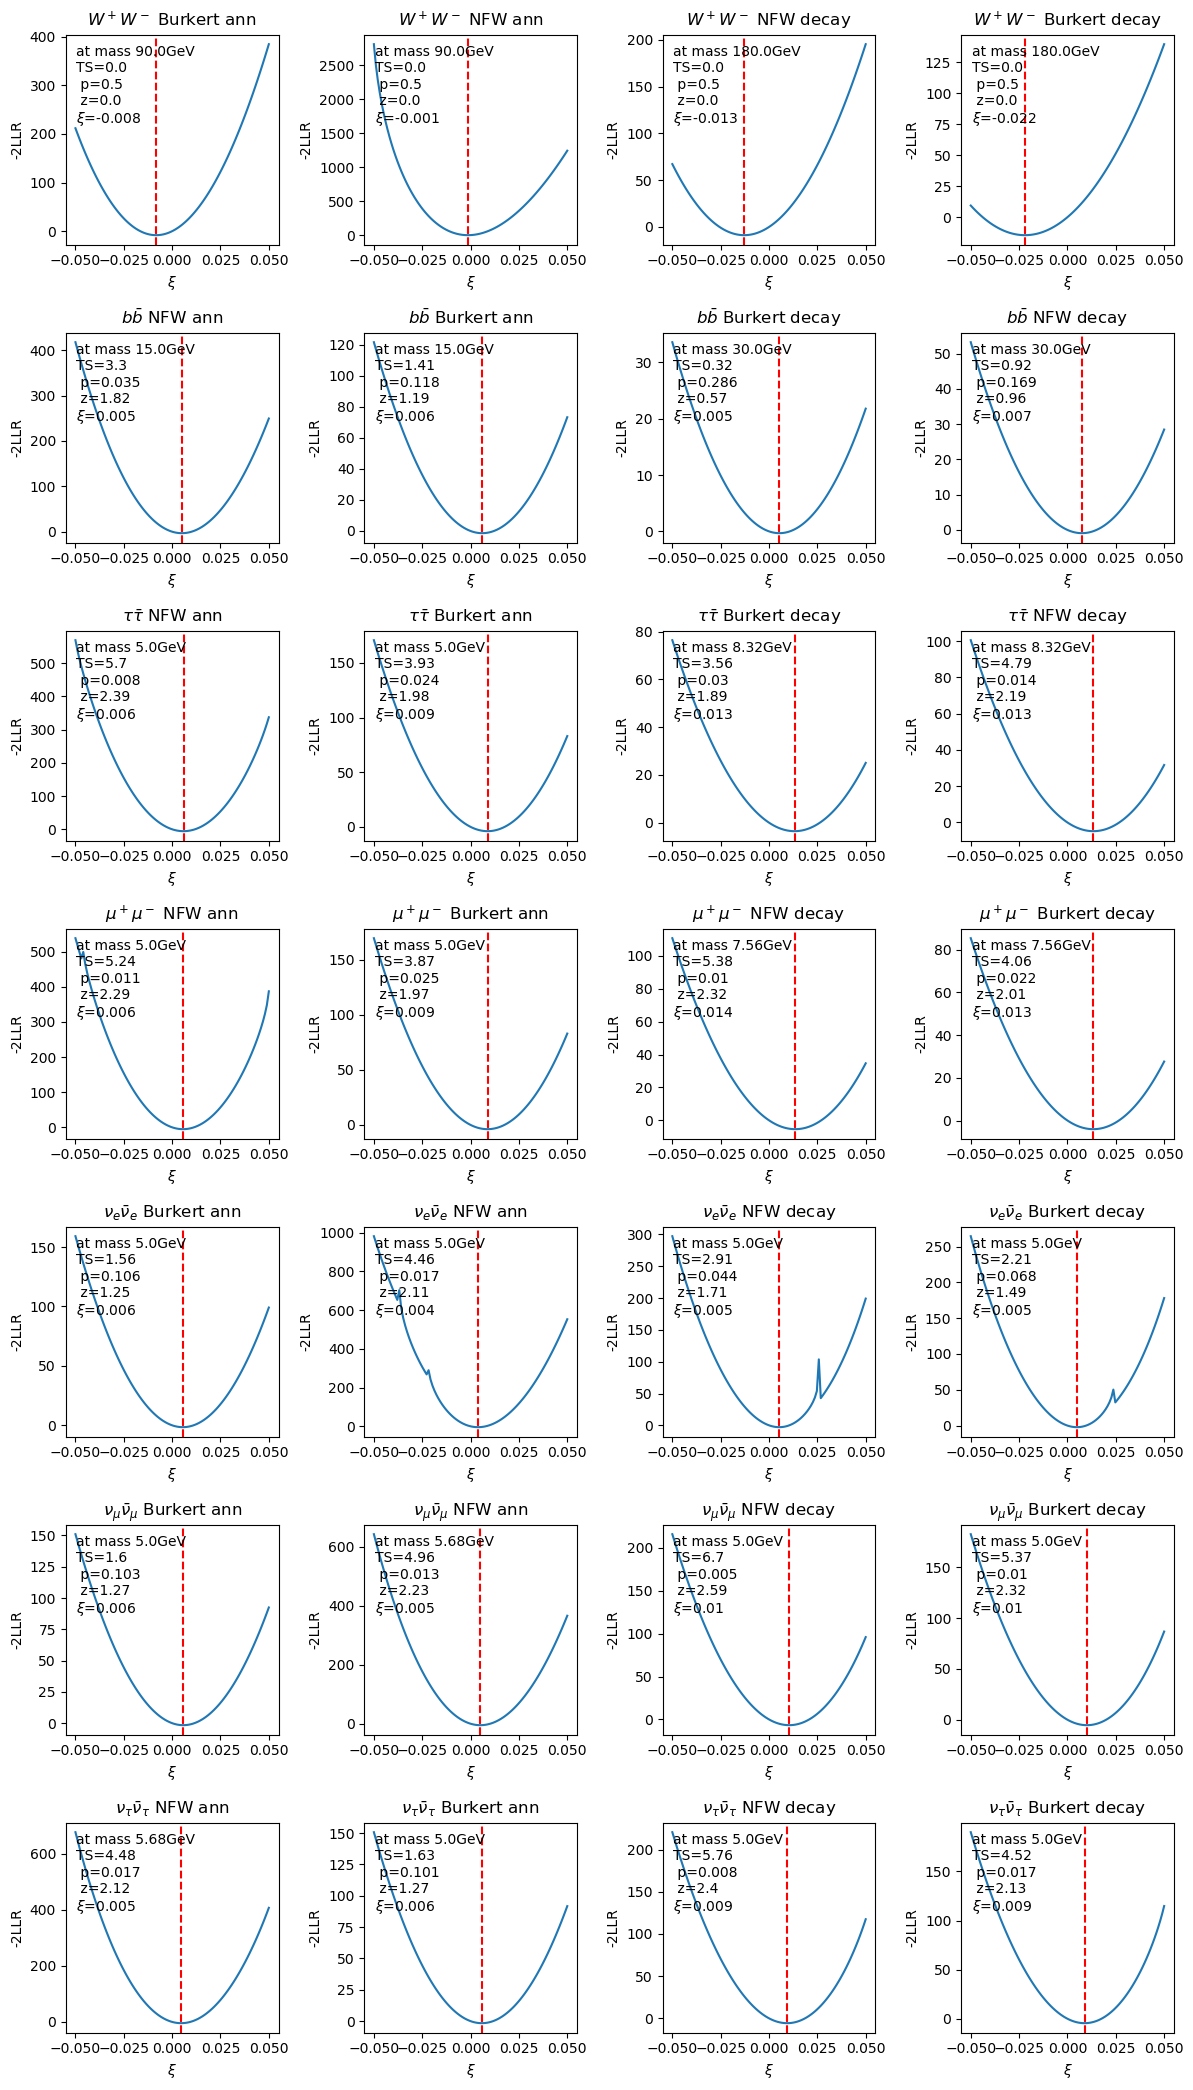

In [9]:
plot_TS_scan(filetag)

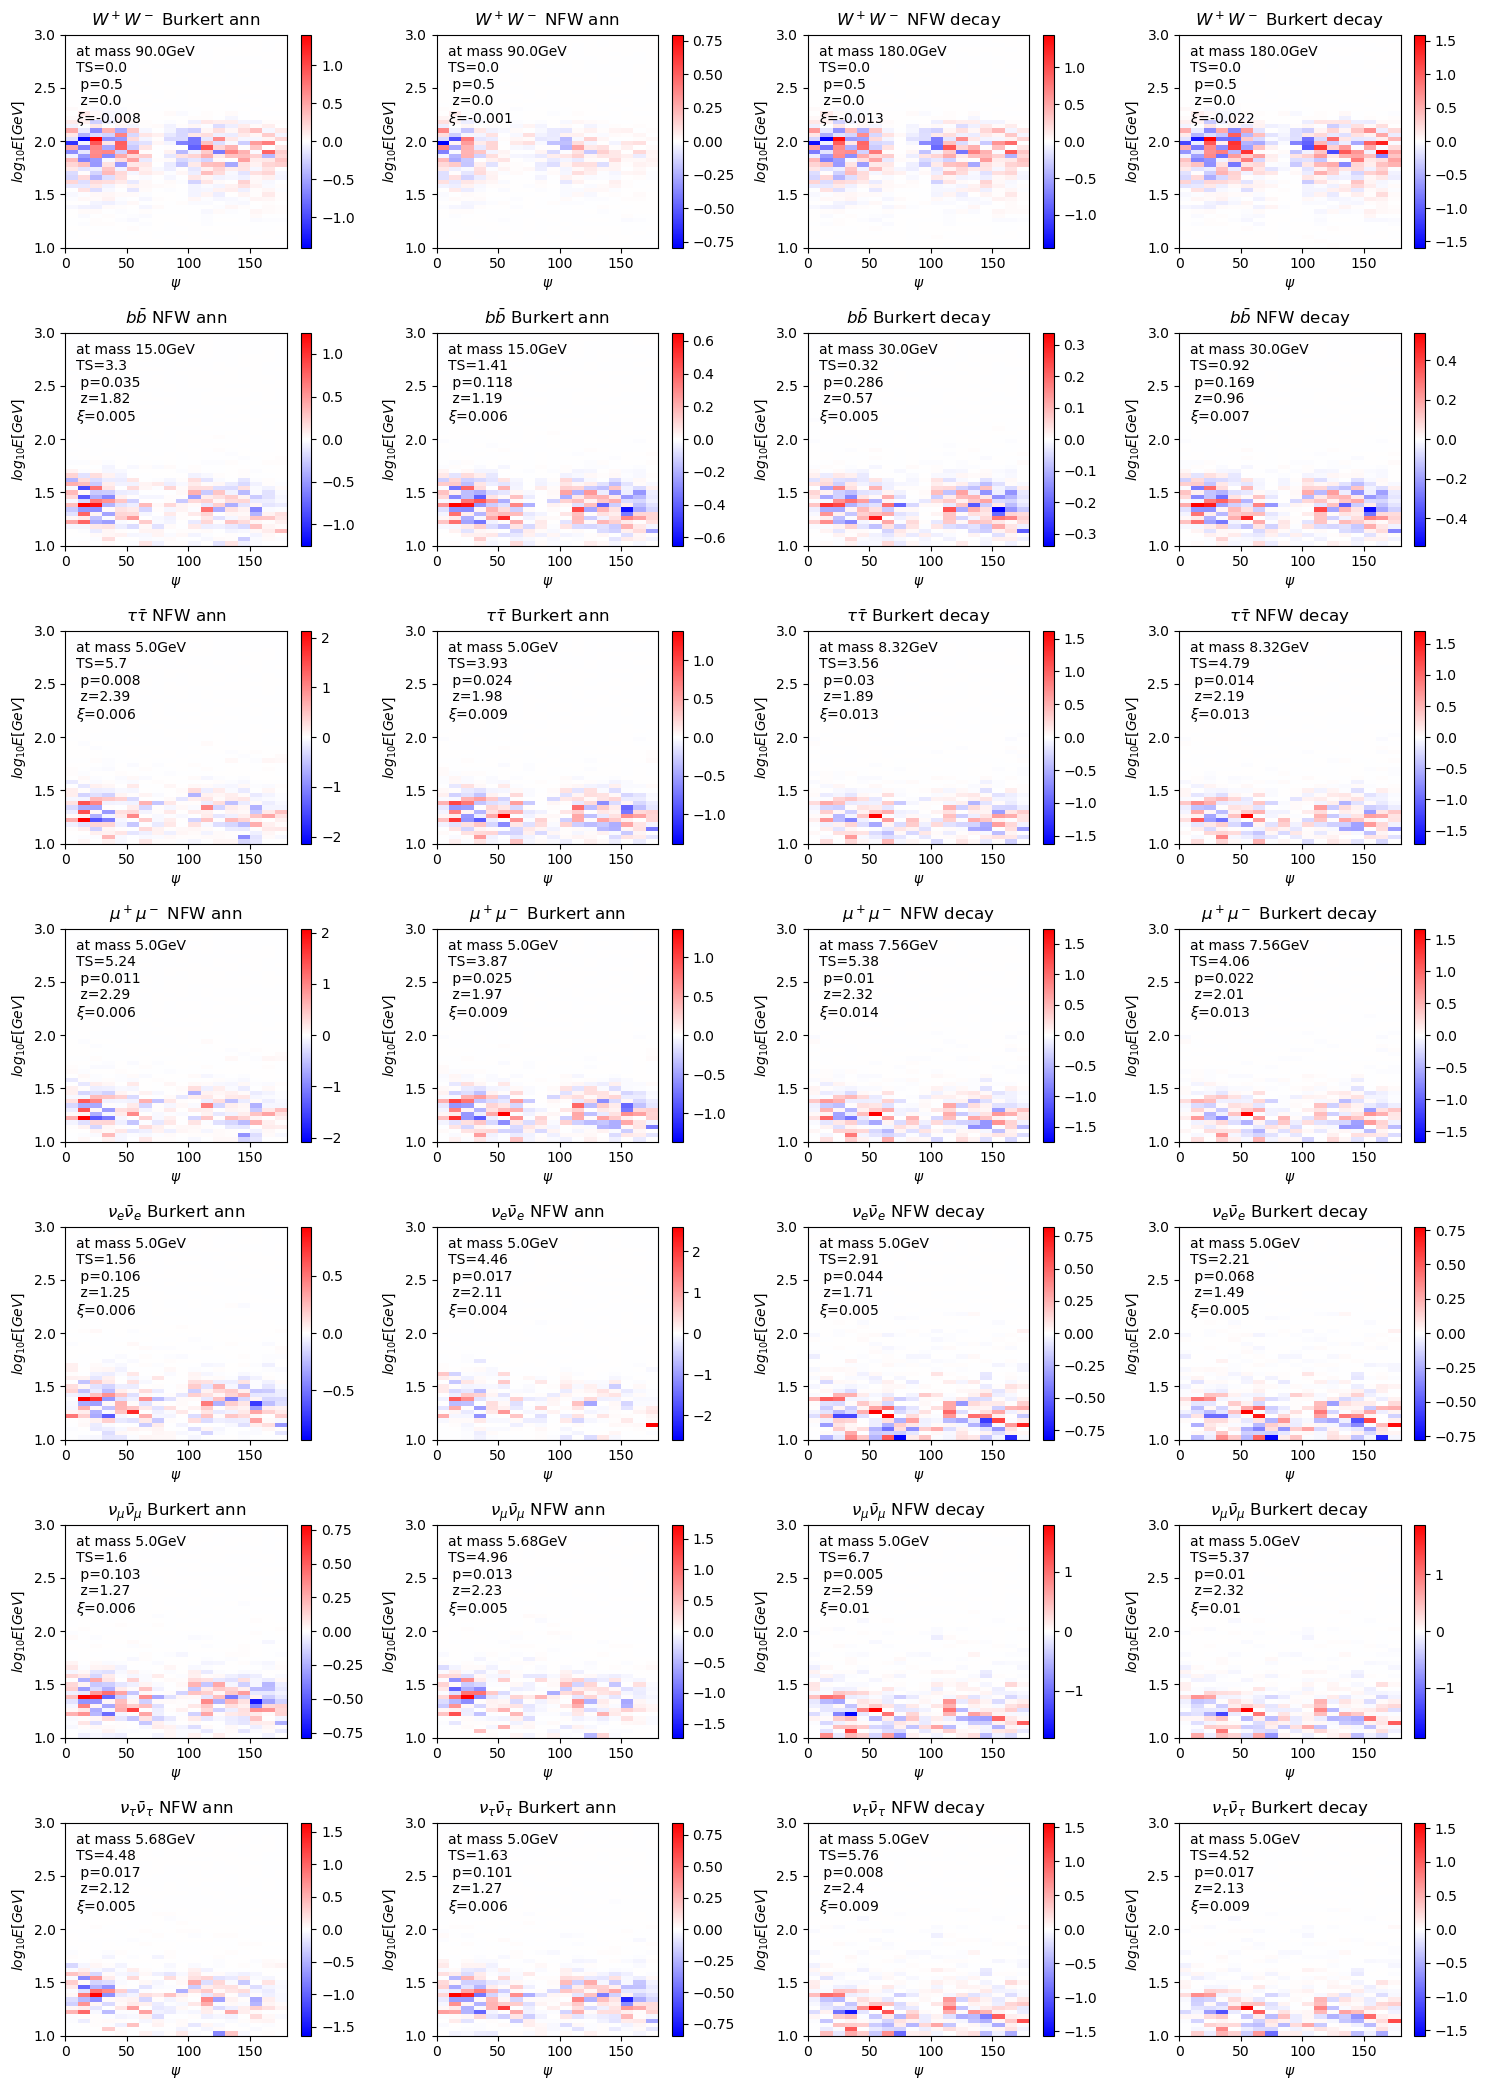

In [10]:
plot_TS_map(filetag)

plot_TS_(filetag)